
<img src="https://datascientest.fr/train/assets/logo_datascientest.png" style="height:150px"> 
<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center" > Machine Learning pour les Data Engineers</h1> 
<h2 style = "text-align:center"> Etude de cas : problème de classification </h2> 
<hr style="border-width:2px;border-color:#75DFC1">

> Dans cet exercice nous allons résoudre une problématique métier à l'aide d'une classification. <br> Les packages utilisés seront **pandas**, **scikit-learn** et ses sous-packages, notamment **tree** et **model_selection**.
>
> <div class="alert alert-success">
<i class="fa fa-question-circle"></i> &emsp; 
Dans cet exercice, nous nous mettons dans la peau d’un Data Scientist pour réaliser un projet en passant par les étapes suivantes : l’exploration, le prétraitement de la base de données, la modélisation et enfin la gestion des biais ayant pu être créés. 
</div>



<h3> 1. Présentation du problème </h3>

>Dans ce notebook, nous travaillons dans une entreprise qui souhaite prédire **la résiliation des contrats de leurs clients** en fonction de certaines données. Nous sommes donc dans un cas de classification **binaire** (résiliation ou non résiliation). A noter qu'il exitse également des problèmes de classification dit **multi-classes**, c'est-à dire lorsque la variable cible prend plus de deux modalités.
>
>Cette analyse est importante pour une entreprise car elle permet de cibler les clients susceptibles de départ, en leur proposant de nouvelles offres spécialisées de manière à les fidéliser et éviter un départ. La base de données que nous utiliserons s'appelle `churn.csv`. 
>
>Voici le descriptif des données :
>
>
>|  <p class="text-center">Nom de la colonne</p> | <p class="text-center">Description</p>|
>|:---:|:---:|
>|   <p class="text-center">customerID</p> | <p class="text-center">Identifiant du client</p> |
>|  <p class="text-center">gender</p> | <p class="text-center">Sexe du client</p>   |
>|  <p class="text-center">SeniorCitizen | <p class="text-center">Client agé</p>  |
>|  <p class="text-center">Partner  |  <p class="text-center">Si le client a un partenaire ou non</p>  |
>|  <p class="text-center">Dependents</p> |  <p class="text-center">Si le client a des personnes à charge ou non</p> |
>|  <p class="text-center">tenure</p> |  <p class="text-center">Nombre de mois durant lesquels le client est resté avec l'entreprise</p>  |
>|  <p class="text-center">PhoneService</p> |  <p class="text-center"> Si le client a un service téléphonique ou non</p> |
>|  <p class="text-center">PaperlessBilling</p> |  <p class="text-center">Si le client a une facturation internet </p> |
>| <p class="text-center">MonthlyCharges</p> | <p class="text-center">Montant des factures moyennes</p>  |
>| <p class="text-center">TotalCharges</p> | <p class="text-center">Montant total des factures </p>  |
>| <p class="text-center">Churn</p> | <p class="text-center">Variable cible : est-ce que la personne a résilié son abonnement?  

<h3> 2. Préparation des données </h3>


* **(a)** Exécuter la cellule suivante pour importer les packages nécessaires.



In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


* **(b)** Lire le fichier `'churn.csv'` dans un `DataFrame` et en afficher les premières lignes.




In [2]:
# Insérez votre code ici



df = pd.read_csv('churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,tenure,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,Yes,No,72,24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,Yes,Yes,44,88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,Yes,Yes,38,74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,Yes,Yes,4,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,Yes,No,2,53.45,119.5,No


In [ ]:
df = pd.read_csv('churn.csv')
df.head()



> La colonne `'CustomerId'` est sans importance pour notre problème. Nous pouvons donc la supprimer.

* **(c)** Supprimer la colonne `CustomerId`.



In [3]:
# Insérez votre code ici


df = df.drop(['customerID'], axis=1)

In [ ]:
df = df.drop(['customerID'], axis=1)



* **(d)** Afficher le nombre de valeurs manquantes du `DataFrame`. 



In [4]:
# Insérez votre code ici



df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
PaperlessBilling    0
tenure              0
MonthlyCharges      5
TotalCharges        5
Churn               0
dtype: int64

In [ ]:
df.isna().sum()



> Il y a 5 valeurs manquantes pour les variables `MonthlyCharges` et `TotalCharges`. Nous n'allons pas supprimer ces lignes pour éviter une perte d'information. Nous allons les remplacer. Cependant, nous nous en occuperons une fois que le jeu de données sera séparé en **jeu d'entraînement** et **jeu de test** : nous ne devons pas apporter d'information du jeu de test dans le jeu d'entraînement **ce qui conduirait à un biais pour notre classification**. 
* **(e)** Afficher les catégories prises par la variable `Partner` et par la variable `Dependents`. Que remarquez-vous ? 
 



In [5]:
# Insérez votre code ici


display(df['Partner'].value_counts()) 

display(df['Dependents'].value_counts()) 

No       3080
Yes      2904
Yess        2
Name: Partner, dtype: int64

No     4194
Yes    1791
?         1
Name: Dependents, dtype: int64

In [ ]:
display(df['Partner'].value_counts()) 

display(df['Dependents'].value_counts()) 



> Des outliers se sont glissés dans le jeu de données. Nous allons corriger cela. 

* **(f)**
    * (1) Pour la variable `Partner`, remplacer les valeurs "Yess " par "Yes".
    * (2) Pour la variable `Dependents`, remplacer le "?" par la modalité la plus courante. 



In [6]:
# Insérez votre code ici

df['Partner'] = df['Partner'].replace("Yess ", "Yes")
df['Dependents'] = df['Dependents'].replace("?", "No")

In [ ]:
df['Partner'] = df['Partner'].replace("Yess ", "Yes")
df['Dependents'] = df['Dependents'].replace("?", "No")



* **(g)** Certaines valeurs de la variable `TotalCharges` sont renseignées par un espace. Supprimer ces valeurs puis transformer le type de `TotalCharges` en `float`.



In [7]:
# Insérez votre code ici


df = df[df['TotalCharges'] != ' ']
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [ ]:
df = df[df['TotalCharges'] != ' ']
df['TotalCharges'] = df['TotalCharges'].astype('float')




* **(h)** Séparer le jeu de données en deux `DataFrames` : 
    * *`feats`* contenant les variables explicatives,
     
    * *`target`* contenant la variable cible **`Churn`**.




In [8]:
# Insérez votre code ici

feats = df.drop('Churn', axis=1)
target = df['Churn']

In [ ]:
feats = df.drop('Churn', axis=1)
target = df['Churn']



* **(i)** Séparer le jeu de données en un jeu d'entraînement (`X_train`,`y_train`) et un jeu de test (`X_test`, `y_test`) de sorte que la partie de test contient 25% du jeu de données initial.




In [9]:
# Insérez votre code ici


X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.25, random_state = 42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.25, random_state = 42)



> Maintenant que nous avons séparé notre jeu de données, revenons à notre problème de valeurs manquantes pour les variables `MonthlyCharges` et `TotalCharges`. 

* **(j)** Remplacer les valeurs manquantes pour les variables `MonthlyCharges` et `TotalCharges` par leurs moyennes respectives en estimant la moyenne sur le **jeu d'entraînement** et en l'appliquant sur le **jeu d'entraînement et de test**. 

><div class="alert alert-success">
<i class="fa fa-question-circle"></i> &emsp; 
Nous avons vu dans le <b>notebook 4 "Méthodologie"</b>, l'utilisation du <code>SimpleImputer</code> pour la gestion des valeurs manquantes.
</div>



In [10]:
# Insérez votre code ici 

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train.loc[:,['MonthlyCharges', 'TotalCharges']] = imputer.fit_transform(X_train[['MonthlyCharges', 'TotalCharges']])

X_test.loc[:,['MonthlyCharges', 'TotalCharges']] = imputer.transform(X_test[['MonthlyCharges', 'TotalCharges']])

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train.loc[:,['MonthlyCharges', 'TotalCharges']] = imputer.fit_transform(X_train[['MonthlyCharges', 'TotalCharges']])

X_test.loc[:,['MonthlyCharges', 'TotalCharges']] = imputer.transform(X_test[['MonthlyCharges', 'TotalCharges']])



* **(k)** Standardiser les variables numériques (`'tenure'`, `'MonthlyCharges'`, `'TotalCharges'`) à l'aide de `StandardScaler` en **estimant les paramètres sur le jeu d'entraînement** et en l'appliquant sur le jeu d'entraînement et de test. 

><div class="alert alert-success">
<i class="fa fa-question-circle"></i> &emsp; 
Nous avons vu dans le <b>notebook 4 "Méthodologie"</b> l'utilisation du <code>StandardEncoder</code> pour la standardisation d'un ensemble de données.
</div>




In [11]:
# Insérez votre code ici 



cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
sc = StandardScaler()
X_train[cols] = sc.fit_transform(X_train[cols])
X_test[cols] = sc.transform(X_test[cols])

In [ ]:
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
sc = StandardScaler()
X_train[cols] = sc.fit_transform(X_train[cols])
X_test[cols] = sc.transform(X_test[cols])



> Certaines modalités de nos données sont textuelles. Elles ne pourront pas être traitées par nos algorithmes. En effet, les modèles se basant sur des calculs mathématiques, nous avons besoin que toutes nos données soient numériques : nous allons donc encoder nos variables catégorielles.
>
><div class="alert alert-success">
<i class="fa fa-question-circle"></i> &emsp; 
 Nous avons vu dans le <b>notebook 4 "Méthodologie"</b> l'utilisation du <code>LabelEncoder</code> pour l'encodage de la variable cible et du <code>OneHotEncoder</code> pour les variables explicatives. 
</div>


* **(l)** Encoder les modalités de la variable cible **`Churn`** à l'aide d'un `LabelEncoder` en **estimant l'encodage sur le jeu d'entraînement** et en l'appliquant sur le **jeu d'entraînement et de test**. 
 




In [12]:
# Insérez votre code ici

le = LabelEncoder()

y_train = le.fit_transform(y_train)

y_test = le.transform(y_test)


#Deuxieme stratetegie sans le LabelEncoder

#def replace_yes_no(x):
#    if x == 'No':
#        return 0
#    if x == 'Yes':
#        return 1
#y_train = y_train.apply(replace_yes_no)
#y_test = y_test.apply(replace_yes_no)


In [ ]:
le = LabelEncoder()

y_train = le.fit_transform(y_train)

y_test = le.transform(y_test)


#Deuxieme stratetegie sans le LabelEncoder

#def replace_yes_no(x):
#    if x == 'No':
#        return 0
#    if x == 'Yes':
#        return 1
#y_train = y_train.apply(replace_yes_no)
#y_test = y_test.apply(replace_yes_no)



* **(m)** Encoder les modalités des variables explicatives `gender`, `Partner`, `Dependents`, `PhoneService`, `PaperlessBilling` à l'aide d'un **`OneHotEncoder`** en **estimant l'encodage sur le jeu d'entraînement** et en l'appliquant sur le **jeu d'entraînement et de test**. 





In [13]:

# Le paramètre drop = 'first' permet de supprimer l'une des colonnes créée par le OneHotEncoder
# et donc d'éviter un problème de multicolinéarité
oneh = OneHotEncoder(drop = 'first', sparse=False)

cat = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

X_train.loc[:,cat] = oneh.fit_transform(X_train[cat])

X_test.loc[:,cat] = oneh.transform(X_test[cat])

#deuxieme strategie 

#def replace_gender(x):
#    if x == 'Male':
#        return 0
#    if x == 'Female':
#        return 1
#    
#def replace_yes_no(x):
#    if x == 'No':
#        return 0
#    if x == 'Yes':
#        return 1
    
#X_train['gender'] = X_train['gender'].apply(replace_gender)
#X_train['Dependents'] = X_train['Dependents'].apply(replace_yes_no)
#X_train['Partner'] = X_train['Partner'].apply(replace_yes_no)
#X_train['PhoneService'] = X_train['PhoneService'].apply(replace_yes_no)
#X_train['PaperlessBilling'] = X_train['PaperlessBilling'].apply(replace_yes_no)
#
#X_test['gender'] = X_test['gender'].apply(replace_gender)
#X_test['Dependents'] = X_test['Dependents'].apply(replace_yes_no)
#X_test['Partner'] = X_test['Partner'].apply(replace_yes_no)
#X_test['PhoneService'] = X_test['PhoneService'].apply(replace_yes_no)
#X_test['PaperlessBilling'] = X_test['PaperlessBilling'].apply(replace_yes_no)


In [ ]:

#premiere strategie

# Le paramètre drop = 'first' permet de supprimer l'une des colonnes créée par le OneHotEncoder
# et donc d'éviter un problème de multicolinéarité
oneh = OneHotEncoder(drop = 'first', sparse=False)

cat = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

X_train.loc[:,cat] = oneh.fit_transform(X_train[cat])

X_test.loc[:,cat] = oneh.transform(X_test[cat])

#deuxieme strategie 

#def replace_gender(x):
#    if x == 'Male':
#        return 0
#    if x == 'Female':
#        return 1
#    
#def replace_yes_no(x):
#    if x == 'No':
#        return 0
#    if x == 'Yes':
#        return 1
    
#X_train['gender'] = X_train['gender'].apply(replace_gender)
#X_train['Dependents'] = X_train['Dependents'].apply(replace_yes_no)
#X_train['Partner'] = X_train['Partner'].apply(replace_yes_no)
#X_train['PhoneService'] = X_train['PhoneService'].apply(replace_yes_no)
#X_train['PaperlessBilling'] = X_train['PaperlessBilling'].apply(replace_yes_no)
#
#X_test['gender'] = X_test['gender'].apply(replace_gender)
#X_test['Dependents'] = X_test['Dependents'].apply(replace_yes_no)
#X_test['Partner'] = X_test['Partner'].apply(replace_yes_no)
#X_test['PhoneService'] = X_test['PhoneService'].apply(replace_yes_no)
#X_test['PaperlessBilling'] = X_test['PaperlessBilling'].apply(replace_yes_no)




<h3> 3. Classification </h3> 


> Nos données sont prêtes, nous pouvons maintenant passer à la partie **modélisation**. Pour chacun des modèles que nous allons implémenter, nous allons les évaluer grâce à la matrice de confusion et aux métriques usuelles : le **score**, le **rappel**, la **précision** et le **f1-score**. 
>
><div class="alert alert-success">
<i class="fa fa-question-circle"></i> &emsp; 
Ces métriques et leurs interprétations sont détaillées dans le <b>notebook 3 "Modèles Linéaires et Modèles Arbres"</b>.
</div>


<h4> 3.1. Régression logistique </h4> 

* **(a)**
    * (1) Instancier un modèle `LogisticRegression` de **régression logistique** et entraîner le sur vos données d'entraînement.
    * (2) Évaluer le modèle à l'aide de la méthode `score` sur les données d'entraînement et de test.




In [14]:
#Insérez votre code ici


from sklearn.linear_model import LogisticRegression

reglog = LogisticRegression()
reglog.fit(X_train, y_train)

print('Score sur ensemble train', reglog.score(X_train, y_train))
print('Score sur ensemble test', reglog.score(X_test, y_test))

Score sur ensemble train 0.7911646586345381
Score sur ensemble test 0.7904953145917001


In [ ]:
from sklearn.linear_model import LogisticRegression

reglog = LogisticRegression()
reglog.fit(X_train, y_train)

print('Score sur ensemble train', reglog.score(X_train, y_train))
print('Score sur ensemble test', reglog.score(X_test, y_test))



* **(b)** Evaluer votre modèle en affichant le `classification_report` et en affichant la **matrice de confusion** de ce dernier. Que pouvez-vous conclure ?



In [15]:
# Insérez votre code ici


from sklearn.metrics import classification_report

y_pred = reglog.predict(X_test)

display(pd.crosstab(y_test,y_pred, rownames=['Realité'], colnames=['Prédiction']))


print(classification_report(y_test, y_pred, ))


# La classe 1 est mal prédite par le modèle. 

Prédiction,0,1
Realité,,
0,1004,94
1,219,177


              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1098
           1       0.65      0.45      0.53       396

    accuracy                           0.79      1494
   macro avg       0.74      0.68      0.70      1494
weighted avg       0.78      0.79      0.78      1494



In [ ]:
from sklearn.metrics import classification_report

y_pred = reglog.predict(X_test)

display(pd.crosstab(y_test,y_pred, rownames=['Realité'], colnames=['Prédiction']))


print(classification_report(y_test, y_pred, ))


# La classe 1 est mal prédite par le modèle. 



<h4> 3.2. DecisionTreeClassifier </h4> 

* **(a)**
    * (1) Instancier un modèle d'arbres de décision et entraîner le sur vos données d'entraînement.
    * (2) Évaluer le modèle à l'aide de la méthode `score` sur vos données d'entraînement et de test.




In [16]:
# Insérez votre code ici



from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

print('Score sur ensemble train', clf.score(X_train, y_train))
print('Score sur ensemble test', clf.score(X_test, y_test))

#On observe un réel overfitting

Score sur ensemble train 0.99776885319054
Score sur ensemble test 0.7128514056224899


In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

print('Score sur ensemble train', clf.score(X_train, y_train))
print('Score sur ensemble test', clf.score(X_test, y_test))

#On observe un réel overfitting



* **(b)** Evaluer votre modèle en affichant le `classification_report` et la **matrice de confusion** de ce dernier. Que pouvez-vous conclure ?



In [17]:
# Insérez votre code ici

from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)

display(pd.crosstab(y_test,y_pred, rownames=['Realité'], colnames=['Prédiction']))
print(classification_report(y_test, y_pred))

# Comme pour la régression logistique, la classe 1 est mal prédite par le modèle.

Prédiction,0,1
Realité,,
0,872,226
1,203,193


              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1098
           1       0.46      0.49      0.47       396

    accuracy                           0.71      1494
   macro avg       0.64      0.64      0.64      1494
weighted avg       0.72      0.71      0.72      1494



In [ ]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)

display(pd.crosstab(y_test,y_pred, rownames=['Realité'], colnames=['Prédiction']))
print(classification_report(y_test, y_pred))

# Comme pour la régression logistique, la classe 1 est mal prédite par le modèle.




> Les arbres de décisions permettent de faire des séparations basées sur les différentes variables en minimisant une fonction que l'on aura choisie a priori. Grâce à ces différentes séparations, il nous est possible de calculer l'importance de chacune des variables, c'est-à-dire le niveau d'impact sur la décision liée à cette variable uniquement. Ces importances peuvent se retrouver grâce à l'attribut `feature_importances_` de notre arbre de décision.

* **(c)** Utiliser l'arbre de décision pour afficher l'importance de toutes les variables.



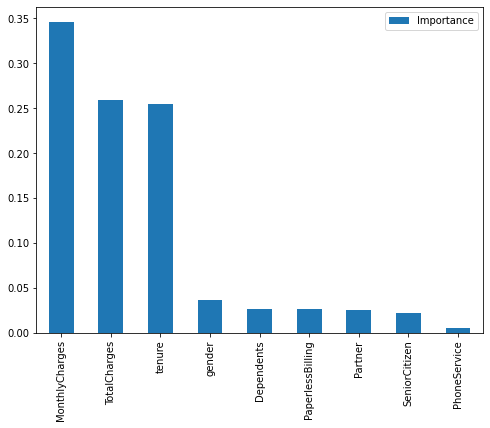

In [19]:
# Insérez votre code ici


import matplotlib.pyplot as plt
%matplotlib inline
feat_importances = pd.DataFrame(clf.feature_importances_, index=feats.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6));

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
feat_importances = pd.DataFrame(clf.feature_importances_, index=feats.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))



> Les variables `MonthlyCharges`, `TotalCharges` et `tenure` sont les variables les plus importantes pour la classification de l'arbre de décision.
> Nous pouvons utiliser ces importances pour tenter de réduire la taille de notre jeu de données et pour interpréter notre modèle. Les variables qui sont les plus importantes pour la décision de l'algorithme sont : `MonthlyCharges` et `TotalCharges`. 

* **(d)** Entraîner votre modèle en ne gardant que les trois variables les plus importantes, comparer ces résultats avec le modèle précédent.




In [20]:
# Insérez votre code ici

X_train_new = X_train[['MonthlyCharges','TotalCharges','tenure','gender']]
X_test_new = X_test[['MonthlyCharges','TotalCharges','tenure','gender']]

clf = tree.DecisionTreeClassifier(random_state=42) 
  
clf.fit(X_train_new, y_train)

print(clf.score(X_train_new,y_train))
print(clf.score(X_test_new,y_test))

0.9941990182954038
0.7128514056224899


In [ ]:
X_train_new = X_train[['MonthlyCharges','TotalCharges','tenure','gender']]
X_test_new = X_test[['MonthlyCharges','TotalCharges','tenure','gender']]

clf = tree.DecisionTreeClassifier(random_state=42) 
  
clf.fit(X_train_new, y_train)

print(clf.score(X_train_new,y_train))
print(clf.score(X_test_new,y_test))



* **(e)** Evaluer votre modèle en affichant le `classification_report` et la **matrice de confusion**. Que pouvez-vous conclure ?



In [21]:
# Insérez votre code ici

from sklearn.metrics import classification_report

y_pred = clf.predict(X_test_new)

display(pd.crosstab(y_test,y_pred, rownames=['Realité'], colnames=['Prédiction']))
print(classification_report(y_test, y_pred))

Prédiction,0,1
Realité,,
0,894,204
1,225,171


              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1098
           1       0.46      0.43      0.44       396

    accuracy                           0.71      1494
   macro avg       0.63      0.62      0.63      1494
weighted avg       0.71      0.71      0.71      1494



In [ ]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test_new)

display(pd.crosstab(y_test,y_pred, rownames=['Realité'], colnames=['Prédiction']))
print(classification_report(y_test, y_pred))



> Nous pouvons observer que nous ne perdons pas la performance de notre modèle en enlevant un certain nombre de données, les résultats peuvent même parfois être meilleurs. La réduction de la dimension de notre jeu de données peut donc être une étape cruciale dans l'élaboration de notre modèle.
>
>Nous pouvons à présent afficher l'arbre correspondant aux différentes séparations avec le nombre de variables réduit. Nous réinstancions un modèle en choisissant une profondeur maximale de l'arbre de 3 par souci de visualisation. La cellule de code pour l'afficher est la suivante.

* **(f)** Exécuter la cellule de code suivante pour afficher l'arbre de décision. 




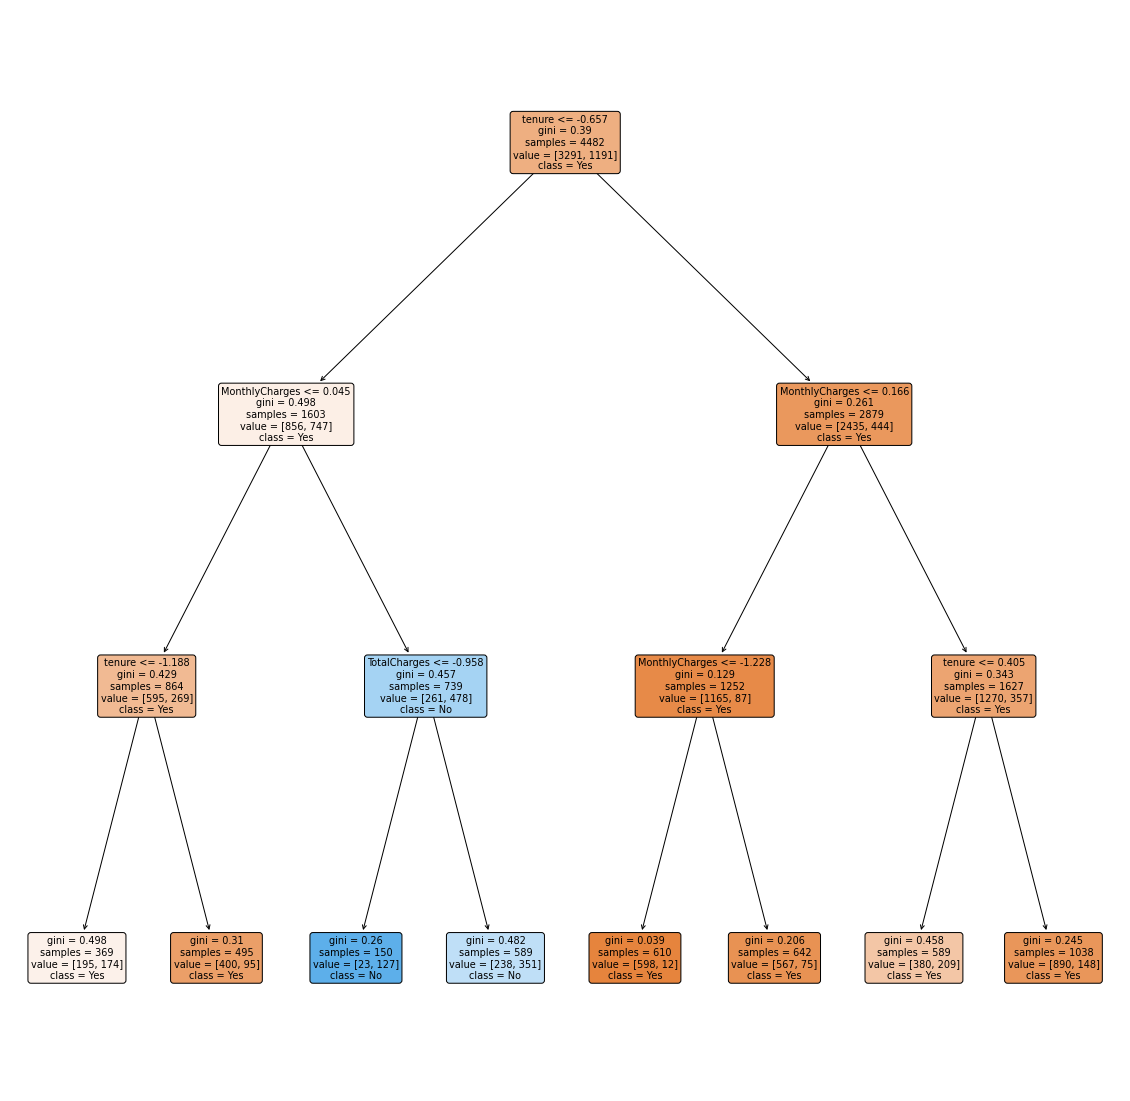

In [22]:
from sklearn.tree import plot_tree 

clf = tree.DecisionTreeClassifier(random_state=42,max_depth = 3) 

clf.fit(X_train_new, y_train)

fig, ax = plt.subplots(figsize=(20, 20))  

plot_tree(clf, 
          feature_names = ['MonthlyCharges','TotalCharges','tenure','gender'],
          class_names = ['Yes','No'],
          filled = True, 
          rounded = True)

plt.show()



><b> Comment interpréter cet arbre ? </b>
>
>- Nous regardons dans un premier temps la valeur de `tenure`, si elle est inférieure à -0.857, nous passons à gauche de l'arbre. Dans le cas contraire, nous passons à droite;
>- Si nous sommes dans le sous-arbre de gauche, nous regardons à présent la variable `MonthlyCharges`. Si celle-ci est inférieure à 0.045, nous passons à gauche de l'arbre, sinon nous passons à droite;
>- Nous faisons de même avec toutes les variables de décisions de chaque nœud dans lequel nous tombons jusqu'à arriver à une feuille, nous donnant la classe majoritaire et par conséquent la prédiction.
> 
> Nous avons affiché l'arbre avec les variables normalisées ce qui rends difficile l'interprétabilité : **à  quoi cela correspond dans la vraie vie lorsque `MonthlyCharges` < 0.045 ?** Pour que cela soit plus interprétable, nous affichons l'arbre de décision avec les données non normalisées juste en dessous. 
><div class="alert alert-success">
<i class="fa fa-question-circle"></i> &emsp; 
    Nous faisons des prédictions et affichons l'arbre avec des données non normalisées car comme nous l'avons vu dans le <b> notebook 3 Modèles arbres et linéaires </b> , ce n'est pas utile de normaliser les données avec un arbre. 
</div>

* **(g)** Exécuter la cellule de code suivante pour afficher l'arbre de décision avec les données non normalisées. 



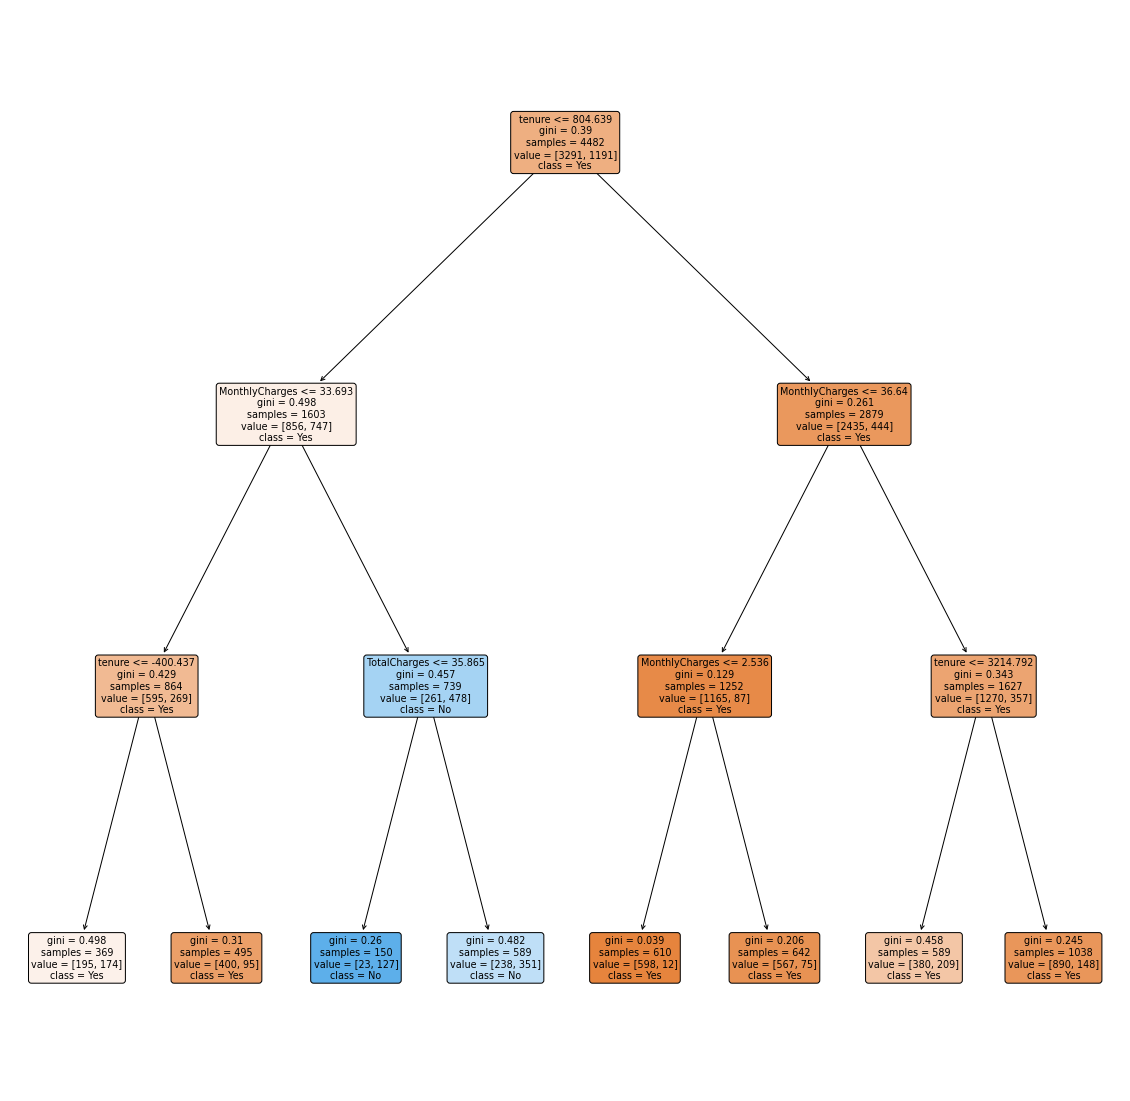

In [23]:
from sklearn.tree import plot_tree 

clf = tree.DecisionTreeClassifier(random_state=42,max_depth = 3) 
  
# La fonction inverse_tranform de StandardScaler permet de retrouver les données de départ non normalisées 
X_train_new_unscaled = sc.inverse_transform(X_train_new[['MonthlyCharges','TotalCharges','tenure']])


clf.fit(X_train_new_unscaled, y_train)

fig, ax = plt.subplots(figsize=(20, 20))  

plot_tree(clf, 
          feature_names = ['MonthlyCharges','TotalCharges','tenure','gender'],
          class_names = ['Yes','No'],
          filled = True, 
          rounded = True)

plt.show()



><b> Comment interpréter cet arbre ? </b>
>
> C'est exactement la même logique que pour l'arbre avec les données **normalisées** :
>- Nous regardons dans un premier temps la valeur de `tenure`, si elle est inférieure à 804, nous passons à gauche de l'arbre. Dans le cas contraire, nous passons à droite;
>- Si nous sommes dans le sous-arbre de gauche, nous regardons à présent la variable `MonthlyCharges`. Si celle-ci est inférieure à 33.7, nous passons à gauche de l'arbre, sinon nous passons à droite;
>- Nous faisons de même avec toutes les variables de décisions de chaque nœud dans lequel nous tombons jusqu'à arriver à une feuille, nous donnant la classe majoritaire et par conséquent la prédiction.
>


<h4> 3.3. RandomForest </h4> 

* **(a)** 
    * (1) Instancier un modèle de forêt aléatoire et entraîner le sur vos données d'entraînement.
    * (2) Évaluer le modèle à l'aide de la méthode `score` sur vos données d'entraînement et de test.




In [24]:
# Insérez votre code ici

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print('Score sur ensemble train', rf.score(X_train, y_train))
print('Score sur ensemble test', rf.score(X_test, y_test))

Score sur ensemble train 0.9975457385095939
Score sur ensemble test 0.7684069611780455


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print('Score sur ensemble train', rf.score(X_train, y_train))
print('Score sur ensemble test', rf.score(X_test, y_test))



* **(b)** Evaluer votre modèle en affichant le `classification_report` et en affichant la **matrice de confusion** de ce dernier. Que pouvez-vous conclure ?



In [25]:
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)

print(pd.crosstab(y_test,y_pred))
print(classification_report(y_test, y_pred))

#On observe de meilleurs résultats

col_0    0    1
row_0          
0      971  127
1      219  177
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1098
           1       0.58      0.45      0.51       396

    accuracy                           0.77      1494
   macro avg       0.70      0.67      0.68      1494
weighted avg       0.75      0.77      0.76      1494



In [ ]:
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)

print(pd.crosstab(y_test,y_pred))
print(classification_report(y_test, y_pred))

#On observe de meilleurs résultats



<h3> 4. Un mot sur le déséquilibre des classes </h3>

* **(a)** Afficher la distribution en pourcentage de la variable cible.




In [26]:
#Insérez votre code ici


target.value_counts(normalize=True)

No     0.734438
Yes    0.265562
Name: Churn, dtype: float64

In [ ]:
target.value_counts(normalize=True)



> Dans notre base clients, 26.5% des clients présents ont résilié leur contrat, ce qui signifie qu'un modèle naïf qui prédit que tous les clients restent, obtiendrait déjà un score de 73,4 % d'**accuracy**. La structure de notre dataset présente donc déjà une limitation et un potentiel biais d'entraînement par son déséquilibre. Une bonne manière de gérer ça et d'effectuer un <b> resampling </b> de nos données. Cela signifie que l'on rajoute aléatoirement des données à la base sous-représentée (oversampling). La librairie `imblearn` permet de faire ces manipulations. 

* **(b)** Exécuter la cellule suivante pour effectuer ce ré-échantillonnage et afficher la nouvelle distribution.




In [27]:
rOs = RandomOverSampler()
X_ro, y_ro = rOs.fit_resample(X_train, y_train)
print('Classes échantillon oversampled :', dict(pd.Series(y_ro).value_counts(normalize = True)))


Classes échantillon oversampled : {0: 0.5, 1: 0.5}



* **(c)** Ré-entrainer votre meilleur modèle avec les données réechantillonnées et commenter les résultats.



In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_ro, y_ro)

print('Score sur ensemble train', rf.score(X_ro, y_ro))
print('Score sur ensemble test', rf.score(X_test, y_test))

from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)


display(pd.crosstab(y_test,y_pred))
print(classification_report(y_test, y_pred))

Score sur ensemble train 0.9981768459434822
Score sur ensemble test 0.7556894243641231


col_0,0,1
row_0,,
0,906,192
1,173,223


              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1098
           1       0.54      0.56      0.55       396

    accuracy                           0.76      1494
   macro avg       0.69      0.69      0.69      1494
weighted avg       0.76      0.76      0.76      1494



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_ro, y_ro)

print('Score sur ensemble train', rf.score(X_ro, y_ro))
print('Score sur ensemble test', rf.score(X_test, y_test))

from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)


display(pd.crosstab(y_test,y_pred))
print(classification_report(y_test, y_pred))



>On observe que le ré-échantillonnage a permis d'augmenter légèrement la **précision**, le **rappel** et le **f1-score** pour la classe 1. Bien que dans notre cas, l'amélioration n'est pas significative, nous pouvons dire qu'un rééquilibrage peut effectivement donner de meilleurs résultats sur la classe sous-représentée.

<h3> 5. Conclusion </h3>

>A partir d'une problématique métier, nous avons modélisé le probléme et entrainé des algorithmes de classification pour y répondre.
>
>Nous avons donc créé un algorithme capable de prédire **la résiliation des contrats des clients d'une entreprise**. Grâce à cela, l'entreprise pourra cibler les clients susceptibles de départ et agir pour éviter une potentielle résiliation.
>
>La **RandomForest** donne les meilleurs résultats. Pour aller plus loin, nous pourrions essayer d'optimiser les paramètres de chacun des modèles afin d'avoir le meilleur score possible tout en tentant de réduire le sur-apprentissage. 
>
> <h4> 5.1 A retenir </h4>
>
> * L'étape de pre-processing et d'exploration du jeu de données est essentielle avant de passer à la partie modélisation.
>
> *  Toutes les modifications de votre jeu de données se font après la séparation du jeu de données d'entraînement et de test pour ne pas ajouter de biais à votre entraînement.
>
> * A chaque fois que l'on entraîne un algorithme de **Machine Learning** en classification, on affiche par la suite sa **matrice de confusion** et son **`classification_report`** pour analyser les résultats. 
>
>
> <h4> 5.2 Et après ? </h4>
>
> Dans le prochain notebook, nous verrons de manière parallèle la mise en pratique d'algorithmes de régression.



<h3> 6. Bonus : la pipeline Scikit-Learn </h3>

> Vous avez vu dans le notebook 4 les pipelines **Scikit-Learn** : elles permettent de **condenser le code** et de **centraliser** toutes les opérations de transformation.  
> 
> Voici un exemple : 
>

* **(a)** Exécuter la cellule suivante pour entraîner la **pipeline** et afficher le résultat.




In [29]:
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Pipeline pour le traitement des valeurs numériques 
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(missing_values=np.nan, strategy="median")), 
           ("scaler", StandardScaler())]
)

# Traitement des variables catégorielles 
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
categorical_transformer = OneHotEncoder(drop = "first", sparse=False)


#Column Tranformer pour appliquer les transformations sur certaines colonnes
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

#Pipeline final de regroupement
clf = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ("classifier", LogisticRegression())]
)

X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.25, random_state = 42)

clf.fit(X_train, y_train)

print("model score: %.3f" % clf.score(X_test, y_test))


model score: 0.786



> La première **`Pipeline`** `numeric_transformer` traite les valeurs numériques : 
> * remplacement des valeurs manquantes avec un `SimpleImputer`, 
> * standardisation avec un `StandardScaler`.
>
>Le **`ColumnTranformer`** `preprocessor` permet de spécifier que les opérations vont s'effectuer uniquement sur certaines colonnes: 
> * Un `SimpleImputer` et un `StandardScaler` sur les variables `'tenure'`, `'MonthlyCharges'` et `'TotalCharges'`,
> * Un `OneHotEncoder` sur les variables `'gender'`, `'Partner'`, `'Dependents'`, `'PhoneService'` et `'PaperlessBilling'`, 
>
>La **`Pipeline`** `clf` permet de rassembler ses transformations et d'entraîner un modèle de classification, ici la `LogisticRegression`. 
>
><div class="alert alert-success">
<i class="fa fa-question-circle"></i> &emsp; Le premier argument de chacune des transformations : "num", "cat", "preprocessor","classifier" est libre. Vous pouvez mettre ce que vous souhaitez, cela permet uniquement de se retrouver plus facilement dans les différentes étapes. </div>
</div>

